# Analysis of Temperature Data in the United States

The data set we consider here came from the [World Bank website](https://climateknowledgeportal.worldbank.org/) where you must make an account to access the data. The data set contains complete average annual temperature data for all the US states from 1901 to 2020.

You can see the data in a [Google sheet](https://docs.google.com/spreadsheets/d/1WoAziMknuEwR0NsfJoQlQ7_KvLwW4pmoZuu8QAA-WXQ/edit#gid=645091525). Here you can see there is one extraneous row we have to skip, and then there are columns for the whole US, and each state. The first column is unlabeled, so we have to rename it when we make the dataframe. We don't want to see every row, so we only show the "head".

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the data file

In [73]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1dO6a3Qv5SfLVK0lQVP3BXk1J-WHfoMiO', skiprows=1)
df.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
df.head()

,year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1901,8.59,16.46,-5.00,14.80,16.04,13.75,6.85,8.14,12.03,...,7.82,13.59,18.62,8.67,5.26,12.14,7.39,10.26,6.18,5.82
1,1902,8.39,17.65,-5.40,14.31,15.87,13.17,6.53,8.34,12.54,...,6.65,14.43,18.89,8.20,5.19,12.75,7.02,10.84,6.30,5.19
2,1903,7.95,16.92,-5.36,14.16,15.25,13.31,5.69,8.33,12.27,...,6.22,13.92,17.44,7.37,5.30,12.43,6.91,10.75,5.41,4.35
3,1904,8.09,17.33,-5.77,14.89,15.73,13.86,6.64,6.79,10.88,...,6.37,13.84,18.54,8.36,3.54,11.56,7.77,9.99,4.59,5.52
4,1905,8.40,17.24,-3.70,14.14,15.43,13.53,5.96,7.89,12.05,...,6.44,14.13,17.72,7.91,4.65,12.39,7.46,10.55,5.54,4.77


Now that we have our data set loaded, maybe we want to first see how the temperature is changing from year to year on the entire US for the last 100 years. This temperature is averaged over the whole US and over the whole year. We use a scatter plot so there are no lines connecting the points.

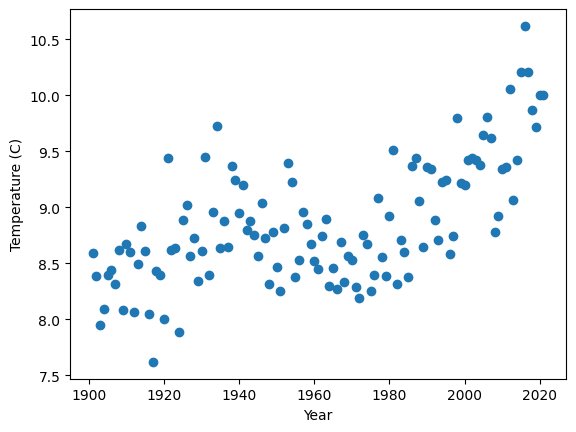

In [74]:
plt.scatter(df['year'], df['United States'])
plt.xlabel('Year')
plt.ylabel('Temperature (C)');

There is clearly an upwards trend in average temperature, but additionally, we know the narrative changed from global warming to climate change indicating that it is not only warming that is occuring. The fact that there may be more extreme weather patterns may be understating the warming that could be more severe warming or cooling in different parts of the country.

This analysis is *aggregated*. We can *disaggregate* it by looking at individual states. Let's look at New York, Washington, Arizona, Kansas, and Georgia. These are the 4 corners of the US with Kansas in the middle.

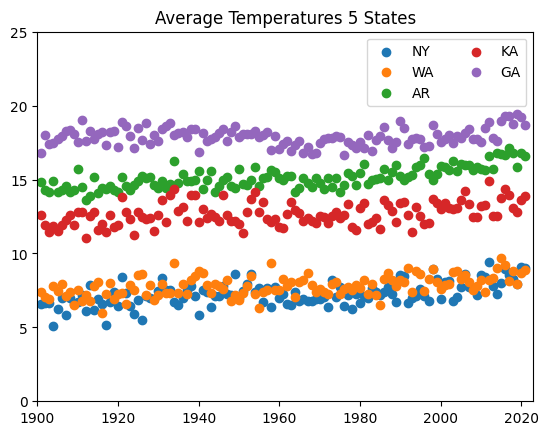

In [75]:
ny = df['New York']
wa = df['Washington']
ar = df['Arizona']
ka = df['Kansas']
ga = df['Georgia']

plt.scatter(df.year, ny)
plt.scatter(df.year, wa)
plt.scatter(df.year, ar)
plt.scatter(df.year, ka)
plt.scatter(df.year, ga)
plt.ylim(0, 25)
plt.xlim(1900, 2023 )
plt.title('Average Temperatures 5 States')
plt.legend(['NY', 'WA', 'AR', 'KA', 'GA'], ncols=2, loc='upper right');

It is more evident from this that some states are generally warmer than others. It isn't too surprising that New York is consistently colder than Georgia. But, these trends look smoother than the national data. It seems like they might be trending upwards. We can be more quantitative than that. To do that, we will fit a line to each one, and see if the slope is positive.

**Exercise** Do this for the state you are from.

What if we want to fit a linear line to one of these scatter plots. We return to polyfit.

In [76]:
from pycse import polyfit


p, pint, se = polyfit(df['year'], ny, 1)
print(pint)

[[ 8.86763323e-03  1.58863297e-02]
 [-2.39031923e+01 -1.01373455e+01]]


This tells us the slope (the first parameter) falls in the range of say 9e-3 to 2e-2. That is small, but positive, and does not include 0, so it is significant. We can see the fit next.

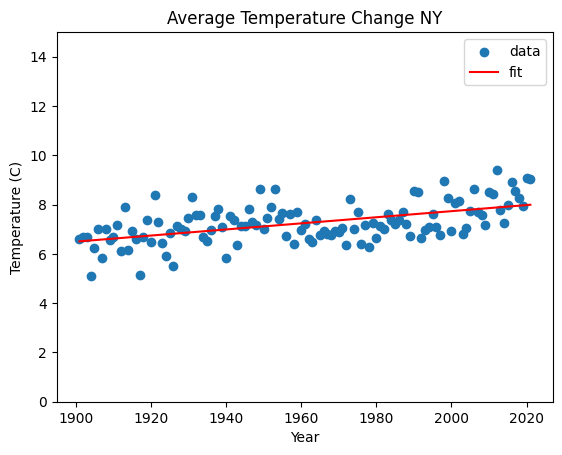

In [77]:
plt.scatter(df.year, ny)
plt.plot(df.year, np.polyval(p, df.year), 'r-')

plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.legend(['data', 'fit'])
plt.ylim(0, 15)
plt.title('Average Temperature Change NY');

Now for another one.

[[-1.56792304e-03  4.59772930e-03]
 [ 8.88496007e+00  2.09777221e+01]]


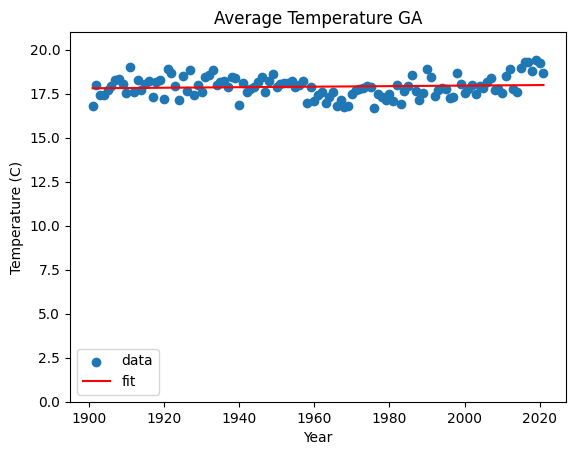

In [78]:
p, pint, se = polyfit(df.year, ga, 1)

plt.scatter(df.year, ga)
plt.plot(df.year, np.polyval(p, df.year), 'r-')
plt.legend(['data', 'fit'])
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.ylim(0, 21)
plt.title('Average Temperature GA')
print(pint)

Note here the confidence interval on the slope includes 0. That means we can not say with confidence that the temperature in Ga has risen over the last century; or more precisely, that it has risen linearly. Temperature is just one dimension of weather though, and this doesn't mean the climate there hasn't changed. There could be changes in precipitation, or storms, for example.

**Exercise** Do this analysis for your state.

## Advanced example

One of the values of programming is automating the analysis. Here we loop through each column and fit a line to each dataset. We fit a line and then print the slope for each one. I use some tools we haven't talked about, including:

1. an iterator on the datafram that returns a name and column for each column in the dataframe
2. a loop over each one of those
3. a formatted string that makes a nice display.

Eventually, you will learn more about Python and be able to do things like this too.

In [85]:
for (cname, cdata) in df.items():
    if cname != 'year':
        p, pint, se = polyfit(df['year'], cdata, 1)
        print(f'{cname:25s} {p[0]:1.2e}')    

United States             9.86e-03
Alabama                   9.45e-04
Alaska                    1.65e-02
Arizona                   1.48e-02
Arkansas                  2.40e-03
California                1.15e-02
Colorado                  9.60e-03
Connecticut               1.86e-02
Delaware                  1.09e-02
District of Columbia      1.05e-02
Florida                   7.20e-03
Georgia                   1.51e-03
Hawaii                    1.81e-02
Idaho                     8.59e-03
Illinois                  5.83e-03
Indiana                   6.60e-03
Iowa                      6.75e-03
Kansas                    8.70e-03
Kentucky                  3.75e-03
Louisiana                 3.71e-03
Maine                     1.43e-02
Maryland                  1.03e-02
Massachusetts             1.92e-02
Michigan                  1.12e-02
Minnesota                 1.33e-02
Mississippi               1.20e-03
Missouri                  4.72e-03
Montana                   1.08e-02
Nebraska            

# Looking at a longer time range

What if we wanted to look at a longer time range for temperature data? We need to open up another dataset. The next data set can be found [here](https://docs.google.com/spreadsheets/d/1JwHWdShploUfGcF7NtdRB_0XU8sChSvlRYwP-RdlU_c/edit#gid=481818530).

This dataset has date, temperature, uncertainty, state and country. We do something a little fancy here and tell pandas to read the date into a special date structure with the `parse_dates` option.

In [94]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1WNi8Y_Qkz413LbnfptsQupmdyOGEb3kL',
                parse_dates=['dt'])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


Dataframes are like arrays, but they are also like databases. We can aggregate data and perform analysis on the results by groups.

If we wanted to look at temperatures by country, we will have to groupby the column "Country". This can be done with the pandas command groupby.

Groupby requires you to indicate what you want to do with the data once it has been grouped. If you want to find out how many instances of each country are in the dataset, and find out what countries are here, we can use .count(). () must be used after count in order to call the function.

In [95]:
df.groupby('Country').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,State
Country,,,,
Australia,16102,15905,15905,16102
Brazil,34328,32451,32451,34328
Canada,35358,32146,32146,35358
China,68506,67726,67726,68506
India,86664,81620,81620,86664
Russia,254972,248249,248249,254972
United States,149745,141930,141930,149745


We can see here that 7 countries are in this dataframe, and we can also see how many entries in the dataset belongs to which country. If we wanted to see the average values associated with each country, we can use the function mean. Mean will provide the average values for each numeric column.

In [96]:
df.groupby('Country').mean()

/var/folders/3q/ht_2mtk52hl7ydxrcr87z2gr0000gn/T/ipykernel_19194/3911788254.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').mean()


,AverageTemperature,AverageTemperatureUncertainty
Country,,
Australia,17.664222,0.576306
Brazil,23.770601,0.768168
Canada,-1.321079,1.608931
China,11.206830,0.887938
India,22.534576,0.868932
Russia,1.808555,1.616641
United States,10.701555,1.269450


Again, we see some countries are hotter, and some are colder. There is no real surprise in here.

In the next step, we look at the time series of data. Here we have to do some "filtering" and "cleaning". 

Lets say we wanted to look at the change in temperature in the US for the time periods in the file.

1. Get the US rows.
2. Remove any rows with empty data entries.
3. Average the state temperatures based on date.
4. Plot the averages.

First, we filter and drop empty rows.

In [98]:
dfus = df[df.Country == 'United States'].copy()
dfus.dropna(inplace = True)
dfus

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States
...,...,...,...,...,...
626435,2013-05-01,10.607,0.208,Wyoming,United States
626436,2013-06-01,16.267,0.276,Wyoming,United States
626437,2013-07-01,20.222,0.133,Wyoming,United States
626438,2013-08-01,19.621,0.217,Wyoming,United States


In [100]:
# Check the date range
dfus['dt'].min(), dfus['dt'].max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

Now the data has been reduced to only include US data however it is clear from this snapshot that we have data from each year from each state. Somehow we need to get the averages of all of the states for each year in order to get the average temperature in the US for each year.

We can do this with groupby again. We group by the date which gathers all entries for each date into a group, and then we get the average of every group.

In [101]:
dfusAvg = dfus.groupby(df['dt'].dt.year).mean()
dfusAvg.head(), dfusAvg.tail()

/var/folders/3q/ht_2mtk52hl7ydxrcr87z2gr0000gn/T/ipykernel_19194/953356477.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfusAvg = dfus.groupby(df['dt'].dt.year).mean()


(      AverageTemperature  AverageTemperatureUncertainty
 dt                                                     
 1743            4.544966                       2.594828
 1744           12.837651                       2.554272
 1745            2.649112                       2.417302
 1750           11.339737                       2.475925
 1751           12.039267                       2.426216,
       AverageTemperature  AverageTemperatureUncertainty
 dt                                                     
 2009           11.156327                       0.220114
 2010           11.732877                       0.211351
 2011           11.811093                       0.232825
 2012           12.761842                       0.269340
 2013           13.077626                       0.337928)

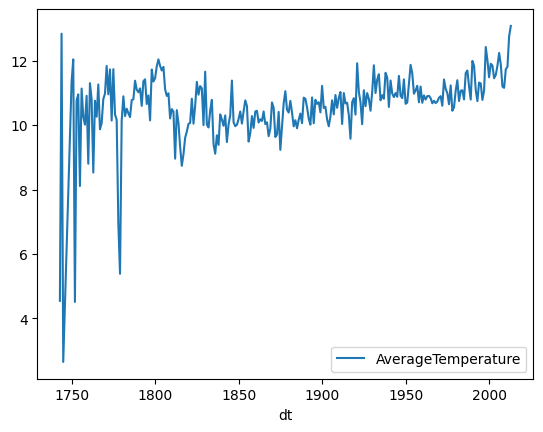

In [102]:
dfusAvg.plot(y='AverageTemperature');

In [103]:
dfusAvg.idxmax(), dfusAvg.max()

(AverageTemperature               2013
 AverageTemperatureUncertainty    1758
 dtype: int64,
 AverageTemperature               13.077626
 AverageTemperatureUncertainty     4.543165
 dtype: float64)

There is a lot more noise in the earliest data. There could be natural explanations for some of the spikes, e.g. volcanic eruptions can cause variations in global temperatures. Obviously you cannot fit a simple line to all this data. There are lots of "wiggles" and nonlinear change here.

Nevertheless, the highest temperature here is the most modern one, and even that is 10 years old now. According to https://www.weather.gov/media/slc/ClimateBook/Annual%20Average%20Temperature%20By%20Year.pdf, the average temperature in the US for 2022 was 55.9 degF. That is 13.3 degC, which is even warmer!

In [105]:
(55.9 - 32) * 5 / 9  # convert Fahrenheit to Celcius.

13.277777777777779

# Conclusions

We have done a lot today! We learned about Jupyter lab, some basic Python, using Python with numpy, matplotlib, pandas and pycse to do data analysis, reading a data file, and then using pandas for aggregating data to do analysis on it.

Each of these topics is an iceberg of content on their own, and we only covered just enough to get us here. There is much more to learn. See the [resources](introduction.ipynb#Resources) for additional reading materials you might find useful as you progress on your Python journey. The best starting point is to build a strong foundation in [pycse](https://kitchingroup.cheme.cmu.edu/pycse/intro.html) for numerical and computational problem solving. After that, [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) is an excellent resource to learn much more about data science. A more advanced resource is [Data science and machine learning in engineering and science](https://kitchingroup.cheme.cmu.edu/dsmles/intro.html). 

# Project

With the remaining time, we suggest that you work on a small project to 
See the [project description](project.md) for the next steps.